In [16]:
# Required header files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score

In [30]:
#Load dataset
iris=sns.load_dataset('iris')
for col in iris.columns:
    if iris[col].dtype=='object':
        iris[col]=pd.Categorical(iris[col]).codes
        
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
#Features and labels
x=iris.drop('species',axis=1)
y=iris['species']
x
y

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int8

In [32]:
#Split train test 70:30
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(105, 4)

(45, 4)

(105,)

(45,)

In [33]:
#Build SVM
svm_clf=svm.SVC()

In [36]:
#Fitting SVM model
svm_clf.fit(train_x,train_y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
#Apply model on test data
y_pred_test=svm_clf.predict(test_x)
y_pred_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int8)

In [41]:
#Accuracy calculation
metrics.accuracy_score(test_y, y_pred_test)

0.9777777777777777

In [42]:
#Create confusion matrix
conf=metrics.confusion_matrix(test_y,y_pred_test)
conf

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 13]], dtype=int64)

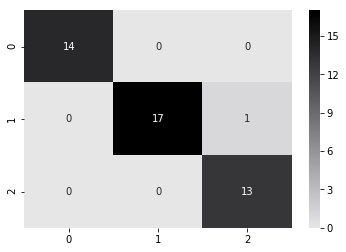

In [47]:
#Plot confusion matrix
cmap=sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9,dark=0, as_cmap=True)
sns.heatmap(conf,cmap=cmap,xticklabels=['0','1','2'],yticklabels=['0','1','2'],annot=True,fmt="d")
plt.show()

In [48]:
#Precision, Recall, FScore
pr_rcl=metrics.precision_recall_fscore_support(test_y,y_pred_test,average='weighted')
pr_rcl

(0.9793650793650793, 0.9777777777777777, 0.9778718400940623, None)